In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import random 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("/dshome/WoongLab/heo/construction_oil/pima/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
def y_label_count(df):
    colors=['lightsteelblue','#FD9F31']
    wedgeprops={'width':0.7, 'edgecolor': 'k', 'linewidth':0.75}
    plt.subplots(figsize=(8,8))
    plt.title('Ratio of Y_LABEL in Total Data', fontsize=20, fontdict={'weight':'bold'})
    plt.rc('font', size=12)
    labels=['0','1']
    plt.pie(df['Outcome'].value_counts(),
            autopct="%.2f%%",shadow=True,startangle=90, textprops={'fontsize':15},
            colors=colors, wedgeprops=wedgeprops, labels=labels)
    plt.tight_layout()
    plt.show()
    
    print('전체 데이터 수:', len(df['Outcome']))
    print('전체 데이터 중 정상인 사람  수: ', df['Outcome'].value_counts()[0])
    print('전체 데이터 중 당뇨병이 있는 사람 수: ', df['Outcome'].value_counts()[1])

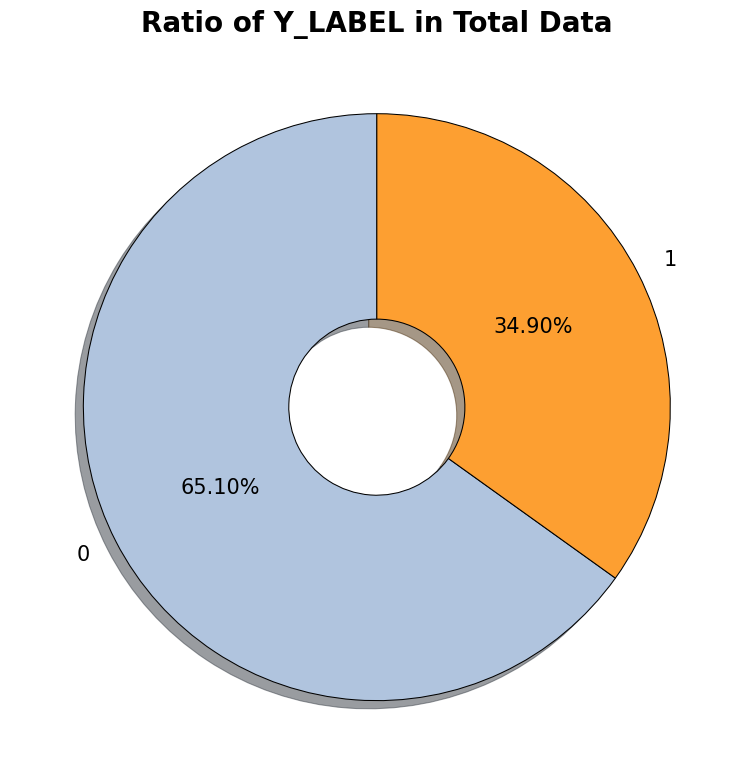

전체 데이터 수: 768
전체 데이터 중 정상인 사람  수:  500
전체 데이터 중 당뇨병이 있는 사람 수:  268


In [8]:
y_label_count(df)

In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
forest = RandomForestClassifier(random_state=42,max_depth=10)

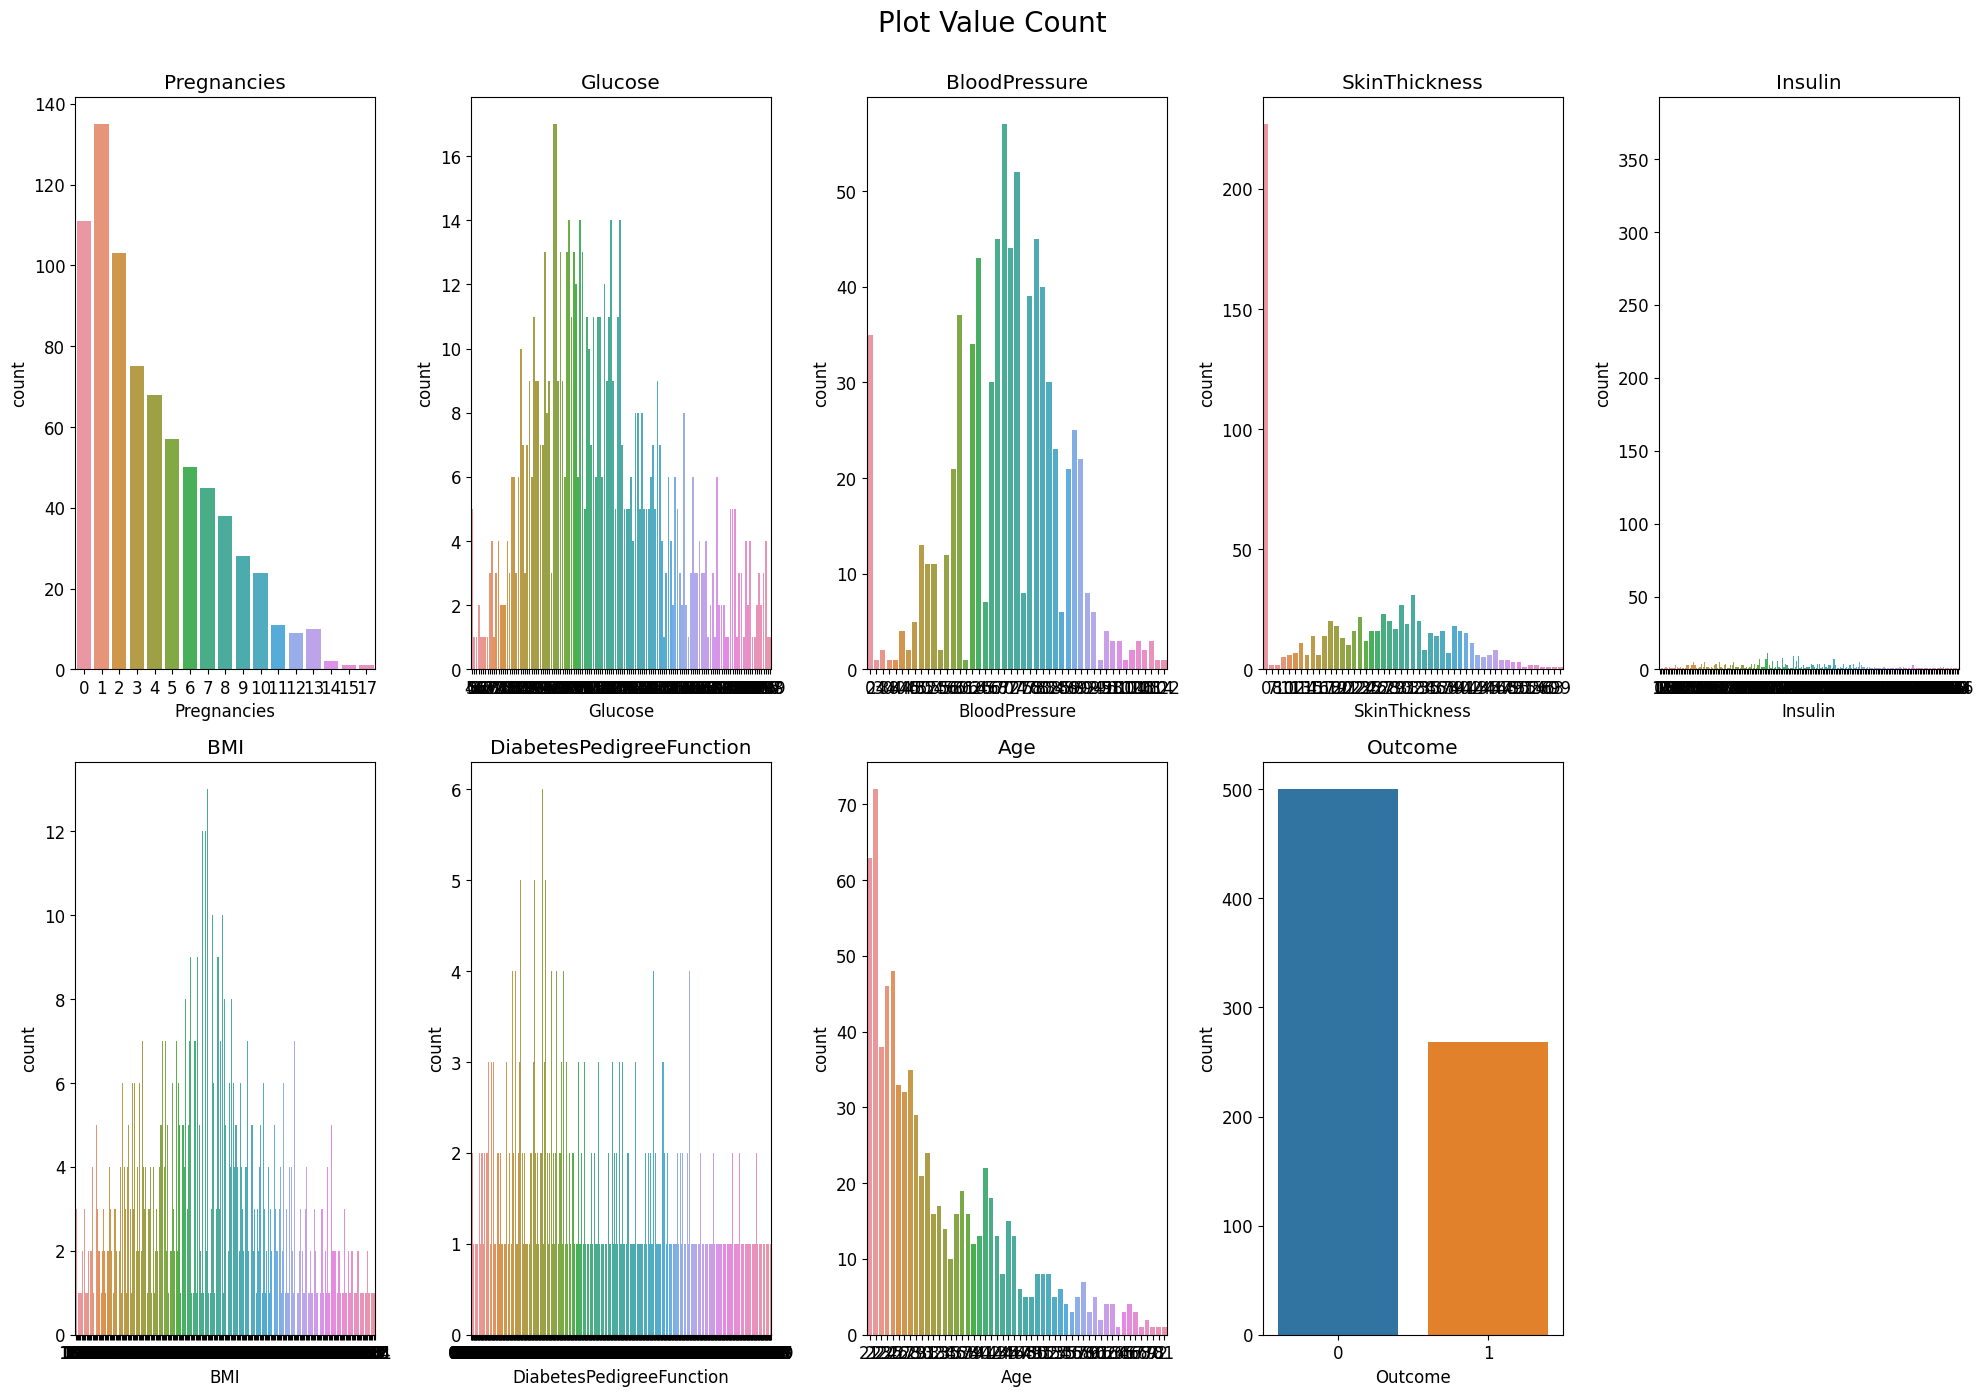

In [11]:
# Countplot on each feature
plt.figure(figsize=(20,60))
for i,column in enumerate(df.columns):
    plt.subplot(len(df.columns), 5, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

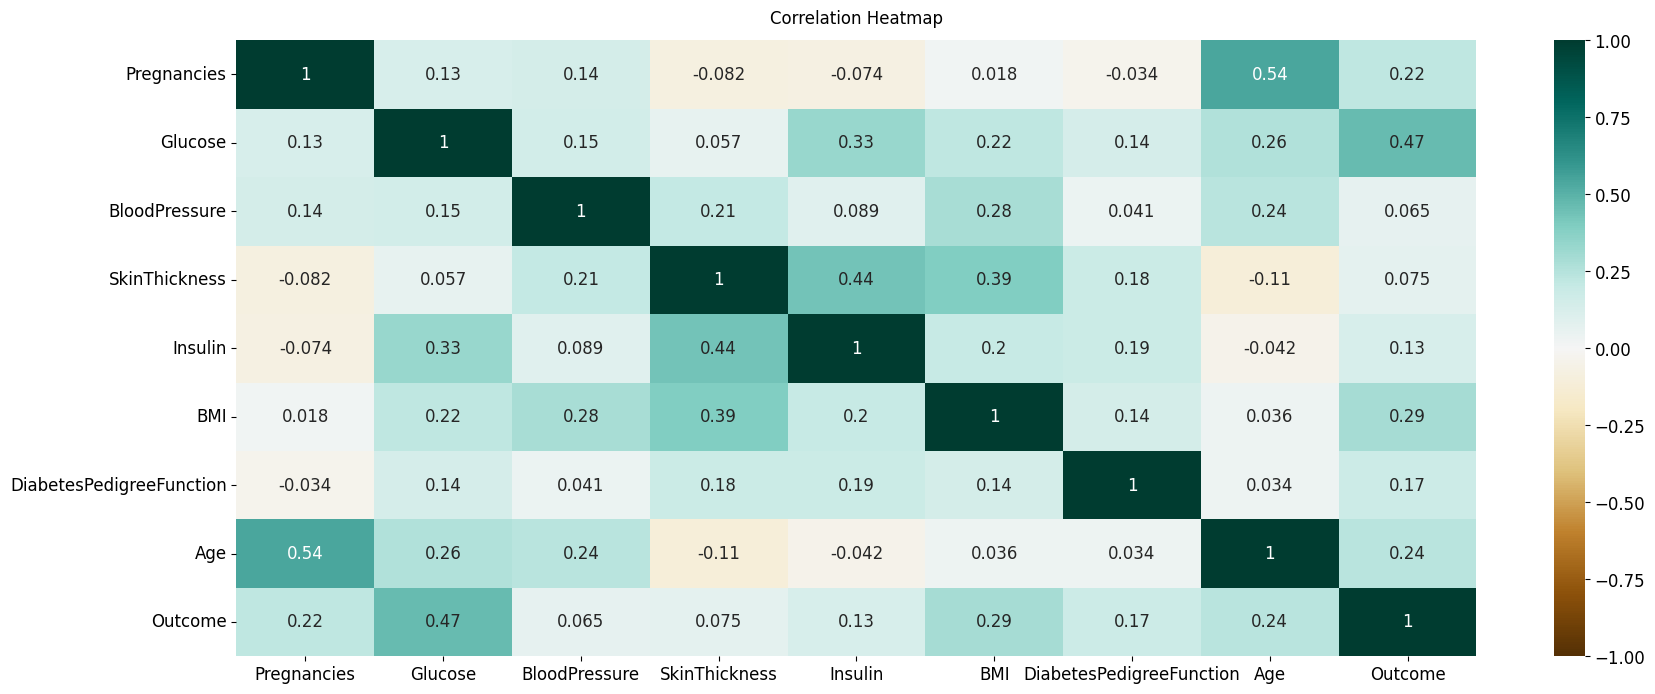

In [12]:
# Explore corrleations between features

plt.figure(figsize=(20,8))
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG');
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [13]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
all_X=df.drop(['Outcome'],axis=1) 
all_y=df['Outcome']

In [15]:
forest.fit(all_X,all_y)

RandomForestClassifier(max_depth=10, random_state=42)

In [16]:
# 변수 중요도를 계산합니다.

importances=forest.feature_importances_

In [17]:
# 변수 중요도가 높은 것부터 차례로 정렬합니다.

indices=np.argsort(importances)[::-1]

In [18]:
print("Feature ranking:")
for f in range(all_X.shape[1]):
    print("%d. %s (%f)" % (f + 1, all_X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Glucose (0.278424)
2. BMI (0.176271)
3. Age (0.129183)
4. DiabetesPedigreeFunction (0.109458)
5. BloodPressure (0.086230)
6. Pregnancies (0.084936)
7. Insulin (0.073205)
8. SkinThickness (0.062293)


In [19]:
train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2, random_state=42, stratify=all_y)

In [20]:
train_data=pd.concat([train_X,train_y],axis=1)
test_data=pd.concat([test_X,test_y],axis=1)

In [21]:
train_data.to_csv('/dshome/WoongLab/heo/construction_oil/preprocessed_data/pima_train_data.csv',index=False)

test_data.to_csv('/dshome/WoongLab/heo/construction_oil/preprocessed_data/pima_test_data.csv',index=False)